# EDA practice

using dataset called iris-

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

firstly load dataset - 

In [2]:
iris = pd.read_csv("/media/rahul0324/Disk-D/Applied_Dataset/Iris_Dataset/iris-species/Iris.csv")

In [3]:
# find out how many rows and columns are there
iris.shape

(150, 6)

from the above value its means we have a table of 150 rows and 6 columns

In [4]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

above value shows the name of the columns from our table also called as dataset simillarly.

now we are droping the id column from our dataset

In [5]:
iris.drop("Id", axis = 1, inplace = True)

In [6]:
iris.shape

(150, 5)

In [7]:
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
new_iris = iris.rename(columns = {"SepalLengthCm":"sepal_length", "SepalWidthCm":"sepal_width", "PetalLengthCm":"petal_length", "PetalWidthCm":"petal_width", "Species":"species"})

In [9]:
new_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

above code shows how we have rename the columns name

find out how many data points does each class have - 

In [10]:
new_iris["species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

so the above value shows how many are there for each class for as example virginica have 50 and so on ...

 ## Now let's see some ploting tools ... like 2-D Scatter Plot

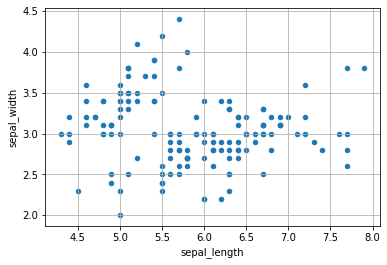

In [11]:
new_iris.plot(kind = 'scatter', x = 'sepal_length', y = 'sepal_width');
plt.grid()
plt.show()

from above graph we can't distinguish that which flower belongs to where...
so let's color with their species belongs - 

/home/rahul0324/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


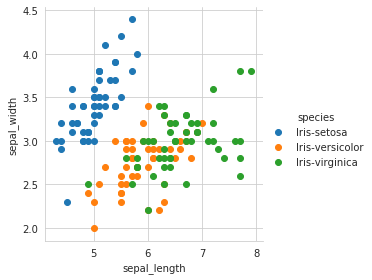

In [12]:
sns.set_style('whitegrid')  # using this we have made white grid box
sns.FacetGrid(new_iris, hue = 'species', size = 4)\
   .map(plt.scatter, 'sepal_length', 'sepal_width')\
   .add_legend();
plt.show();

so from the above graph we can easily distinguish setosa flower just by drawing a line and we can simply say that the flower which comes above the line is setosa and which comes below the line in not setosa(i.e either versicolor or verginica) ...

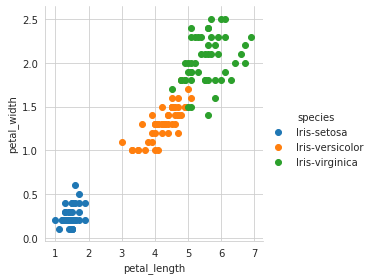

In [13]:
sns.set_style('whitegrid')
sns.FacetGrid(new_iris, hue = 'species', size = 4)\
   .map(plt.scatter, 'petal_length', 'petal_width')\
   .add_legend();
plt.show()

## for 3-D ploting - refer pyplot

## Let's see some pair-plot (generaly we do this inorder to visualize 4-d, 5-d..etc)

/home/rahul0324/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


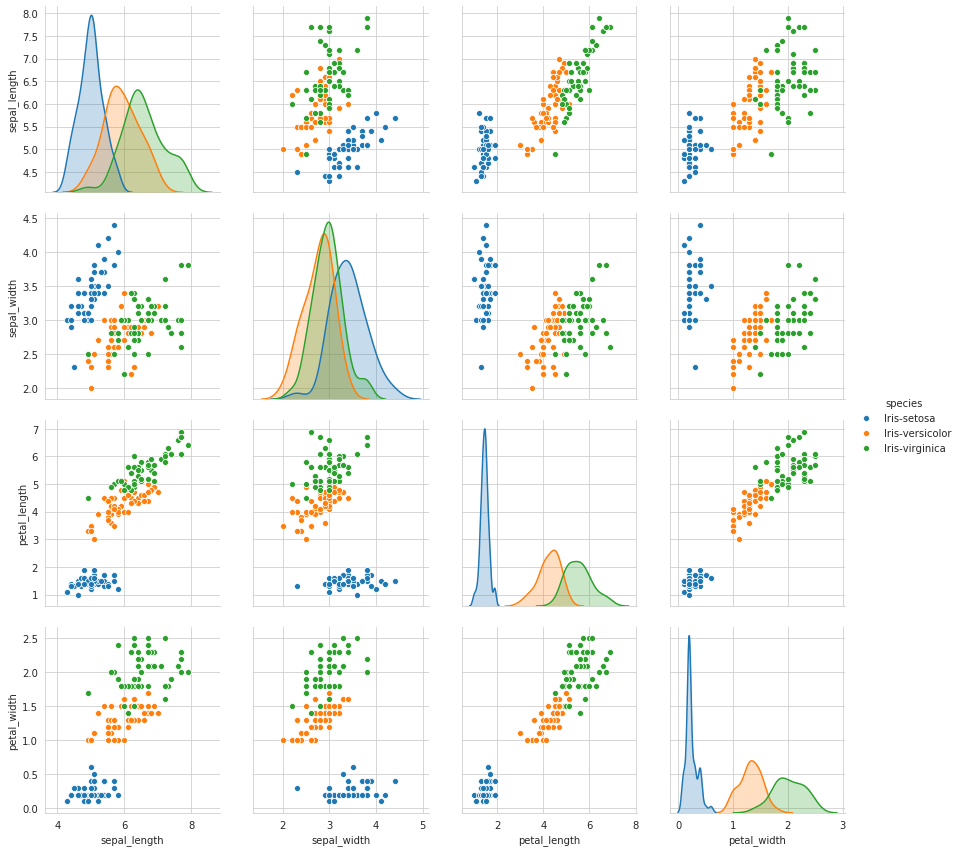

In [14]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(new_iris, hue = 'species', height = 3)
plt.show();

# above code shows how to plot using pair plot ..
# the diagonal elements are PDF for each feature.

here we only need to visualize the graph which is above the diagonal graph because the graph which is below the diagonal its just mirror image of above graph - 

## conclusion - 
    1. petal_length and petal_width are the most useful features to identify the flower types.
    2. while setosa can be easily identified(linearly sepearable), virginica and versicolor have some overlap. 
    3. we can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

so after visualizing all the graph we find out that the corner graph which is above the diagonal is more useful because we can come up with model - 

As if(petal_length <= 2 and petal_width <= 1):
        then flower type is setosa.
   
   elif(petal_width < 2 and petal_width >= 1) and (petal_length < 5 and petal_length > 2.5):
        then flower type is versicolor.

## now let's see histogram and pdf - 

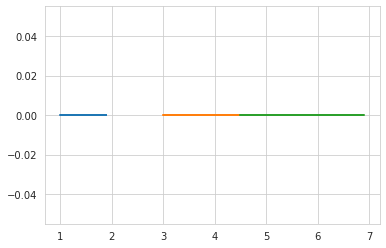

In [15]:
new_iris_setosa = new_iris.loc[new_iris["species"] == "Iris-setosa"];
new_iris_virginica = new_iris.loc[new_iris["species"] == "Iris-virginica"];
new_iris_versicolor = new_iris.loc[new_iris["species"] == "Iris-versicolor"];

plt.plot(new_iris_setosa["petal_length"], np.zeros_like(new_iris_setosa['petal_length']));
plt.plot(new_iris_versicolor["petal_length"], np.zeros_like(new_iris_versicolor['petal_length']));
plt.plot(new_iris_virginica["petal_length"], np.zeros_like(new_iris_virginica['petal_length']));

plt.show();

from the above graph (i.e 1-D scatter plot) all points are overlaping so we can't identify how many points are there is particular region
therefore we use histogram to analyse graphs - 

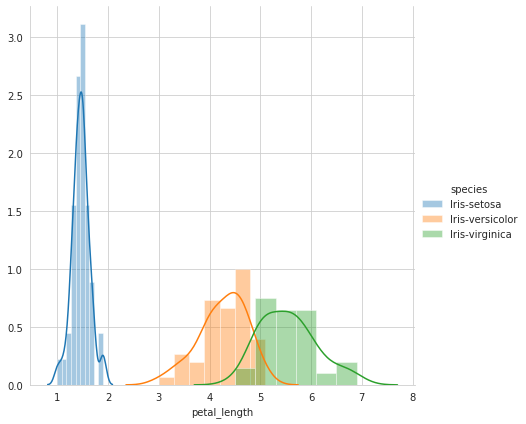

In [16]:
sns.FacetGrid(new_iris, hue = "species", size = 6)\
   .map(sns.distplot, "petal_length")\
   .add_legend();
plt.show()

here in the above graph the smoth lines is PDF(probability density function) basically its the smoth form of our histogram points 

so from the above graph we can come up with one model as - 

if (petal_length <= 2):

    then setosa
    
elif (petal_length < 4.7):

    then versicolor
    
else

    virginica

## now let's see univariate analysis - 

As the name says this is one variable analysis - 

here since we have 4 feature here, we have to find out which one is more useful to build our model so inorder to find out which one is useful we can say this by univariate analysis - 

we will draw histogram an all these 4 feature as x-axis - 


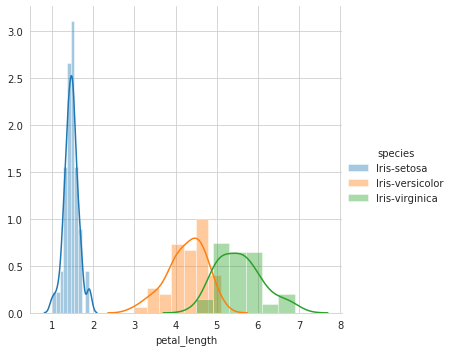

In [17]:
sns.FacetGrid(new_iris, hue = "species", size = 5)\
   .map(sns.distplot, "petal_length")\
   .add_legend();                                   # this one is based on petal length
plt.show();

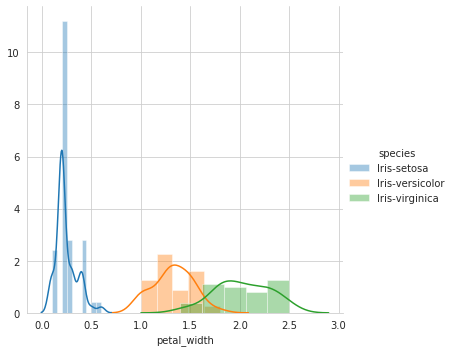

In [18]:
sns.FacetGrid(new_iris, hue = "species", size = 5)\
   .map(sns.distplot, "petal_width")\
   .add_legend();                                      # this one in based on petal width
plt.show();

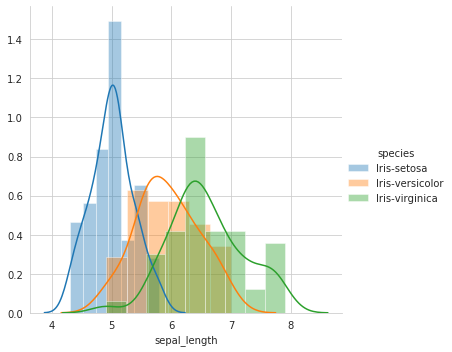

In [19]:
sns.FacetGrid(new_iris, hue = "species", size = 5)\
   .map(sns.distplot, "sepal_length")\
   .add_legend();                                     # this one is based on sepal length
plt.show();

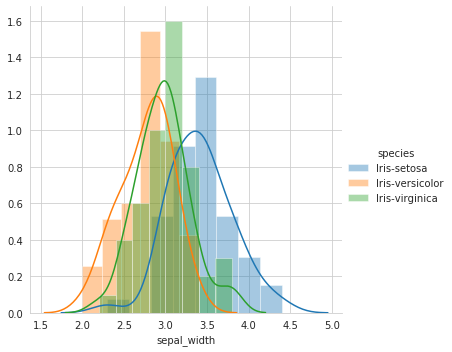

In [20]:
sns.FacetGrid(new_iris, hue = "species", size = 5)\
   .map(sns.distplot, "sepal_width")\
   .add_legend();                                    # this one is based on sepal width
plt.show();

so from the above 4 graph we conclude - 

petal_length > petal_width >> sepal_length >> sepal_width

Therefore we conclude that<font color='red'><b> petal_lenght </b></font> is the best one to pick. similarly we have to pick any two feature we would pick<font color='blue'> <b>petal_length and petal_width </b></font>

## Let's see Mean, Variance and std-dev

Mean tells us about central tendency, but it can give us wrong answer when we have outlier.

Variance is something like spread of histogram.

square root of variance is nothing but std-dev.

## let's see box plot with whiskers - 

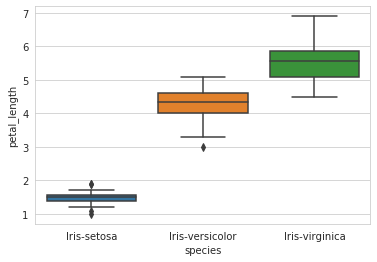

In [30]:
sns.boxplot(x = 'species', y = 'petal_length', data = new_iris);
plt.show();

so here in the above graph the lower line of any box represents the <b>25th percentile</b>, and the middle line represents the <b>50th percentile</b> and lastly the upper line of box represents the <b>75th percentile</b>. that's it.

And the width of the box has no significance.

and the T shape which is above and below the box is called as <b>whiskers</b> which tells us the <font color = 'red'>min and max value</font> of that species.

## Let's see violin plots - 

In violin plots we combine both plots that is (histogram & pdf) and (box-plot) - 

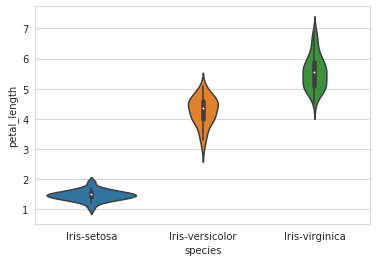

In [33]:
sns.violinplot(x = 'species', y = 'petal_length', data = new_iris, size = 8);
plt.show()

In the above graph <font color = 'red'>the black box type in the centre is box plot</font> and <font color = 'green'>the side curve represents the pdf curve (histogram)</font>.

## Let's see Multivariate probability density, contors plot - 

Using this method we can plot 2-d or 3-d density plot:

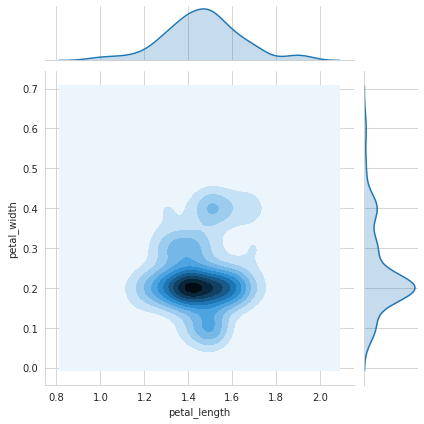

In [39]:
# 2-D density plot, contors-plot
sns.jointplot(x = "petal_length", y = "petal_width", data = new_iris_setosa, kind = "kde");
plt.show()

Here in the above graph we can say that data-points are more in the dark-blue region and similarly its decreasing while moving towards the blue region and very few data-points are the in the light blue region.

Similarly <b>the curve which is from dark blue to light blue are called contours</b>.

And the upper graph and the right-side graph are the simple univariate distribution of petal_length and petal_width.So, if we combine two univariate distribution we will be getting 2-d distribution plot.